# Support Vector Machines

Please study dataset and write a short outline on what you think it is. and then lets codealong this notebook. 

In [41]:
# Pandas and Numpy
import pandas as pd
import numpy as np

# Pyplot for plotting
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

# sklearn preprocessing functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# sklearn support vector machine
from sklearn.svm import SVC

# 
from sklearn.datasets import make_classification, make_blobs

# sklearn evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report


## EDA

In [3]:
# Read in the dataset
data = pd.read_csv('Social_Network_Ads.csv')
data_copy = data.copy()

In [4]:
# Quick inspection of the data
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


//anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


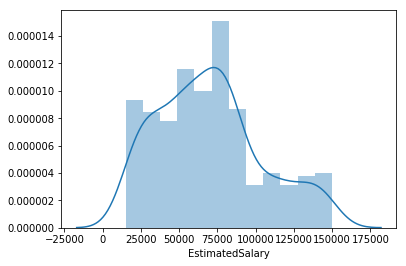

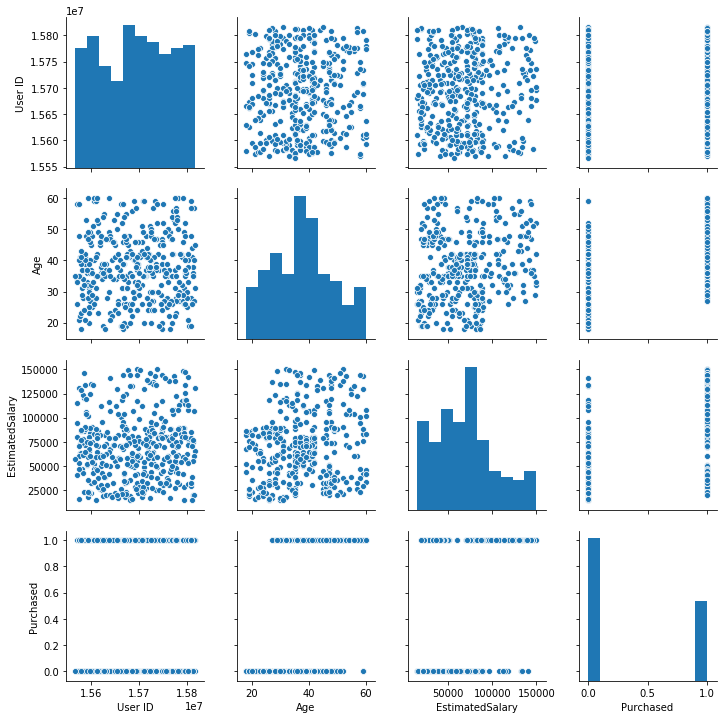

In [6]:
#plt.hist(data['EstimatedSalary'], bins=20)
sns.distplot(data['EstimatedSalary'])

sns.pairplot(data)

The dataset gives informations on three different features, 'User ID', 'Age', 'EstimatedSalary', and, in addition, the binary variable 'Purchased' whuch probability indicates whether or not the user has made a purchase.

In [7]:
# Take only 'Age' and 'EstimatedSalary' columns as features
X = data.iloc[:, [2,3]].values
# 'Purchased' is the predicted
y = data.iloc[:, 4].values

In [8]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [20]:
# Set SVM parameters
kernel = 'rbf'
degree = 5

# Fitting the classifier into the Training set
classifier = SVC(kernel=kernel, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)

//anaconda3/envs/nf/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'figsize'
  s)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


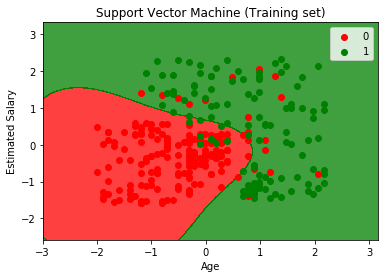

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


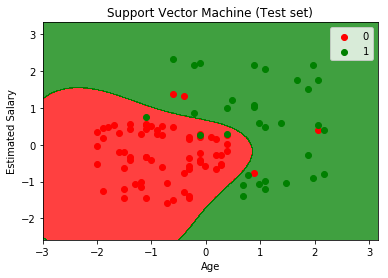

In [22]:
# Visualising the Training set results
X_Set, Y_Set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(
    start=X_Set[:, 0].min() - 1,
    stop=X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(
                         start = X_Set[:, 1].min() - 1,
                         stop = X_Set[:, 1].max() + 1, step = 0.01))

z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

plt.contourf(
    X1,
    X2,
    z,
    alpha = 0.75,
    cmap = ListedColormap(('red', 'green')),
    figsize=(10, 10)
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(
        X_Set[Y_Set == j, 0],
        X_Set[Y_Set == j, 1],
        c = ListedColormap(('red', 'green'))(i),
        label = j
    )
plt.title('Support Vector Machine (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results
X_Set, Y_Set = X_test, y_test

X1, X2 = np.meshgrid(
    np.arange(
        start=X_Set[:, 0].min() - 1,
        stop=X_Set[:, 0].max() + 1, step = 0.01),
    np.arange(
        start=X_Set[:, 1].min() - 1,
        stop = X_Set[:, 1].max() + 1, step = 0.01),
)

z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

plt.contourf(
    X1,
    X2,
    z,
    alpha=0.75,
    cmap=ListedColormap(('red', 'green')),
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(
        X_Set[Y_Set == j, 0],
        X_Set[Y_Set == j, 1],
        c=ListedColormap(('red', 'green'))(i),
        label=j
    )
plt.title('Support Vector Machine (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

(100,)

In [44]:
#X, y = make_classification(n_features=2, n_redundant=0, n_informative=1,
#                             n_clusters_per_class=1, centers=2)

X, y = make_blobs(centers=2)

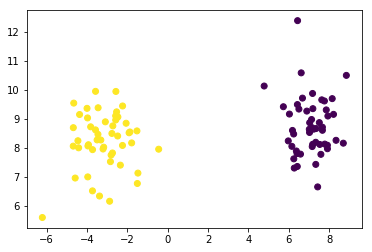

In [45]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [27]:
y.shape

(100,)

In [49]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X)

In [50]:
classifier = SVC(kernel=kernel, random_state=0)
classifier.fit(X_train, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [52]:
classifier.support_vectors_.shape

(14, 2)